In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.pipeline import Pipeline
 # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class
from collections import Counter

In [226]:
ic_df = pd.read_csv(r"C:\Users\SONY\Downloads\Automobile_insurance_fraud.csv")
ic_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [227]:
ic_df.dtypes


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [228]:
ic_df.shape


(1000, 40)

In [229]:
ic_df.nunique()


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [230]:
ic_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [231]:
ic_df.drop('_c39', axis=1, inplace=True)


# EDA

univariate analysis

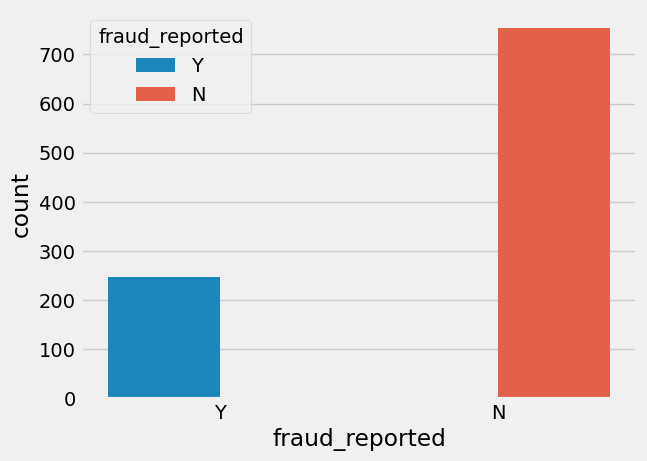

In [232]:
#creating barplot for fraud_reported
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=ic_df, hue='fraud_reported')


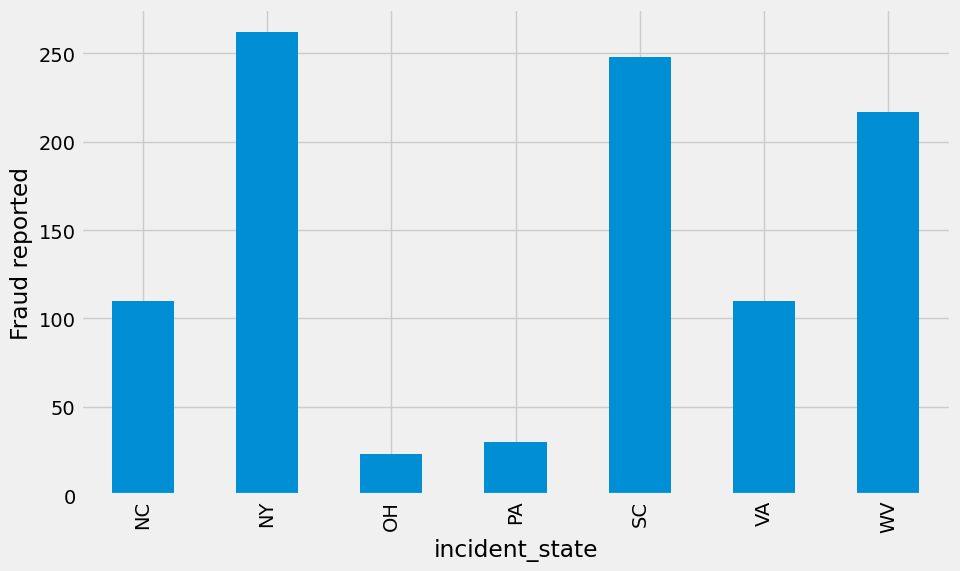

In [233]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = ic_df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

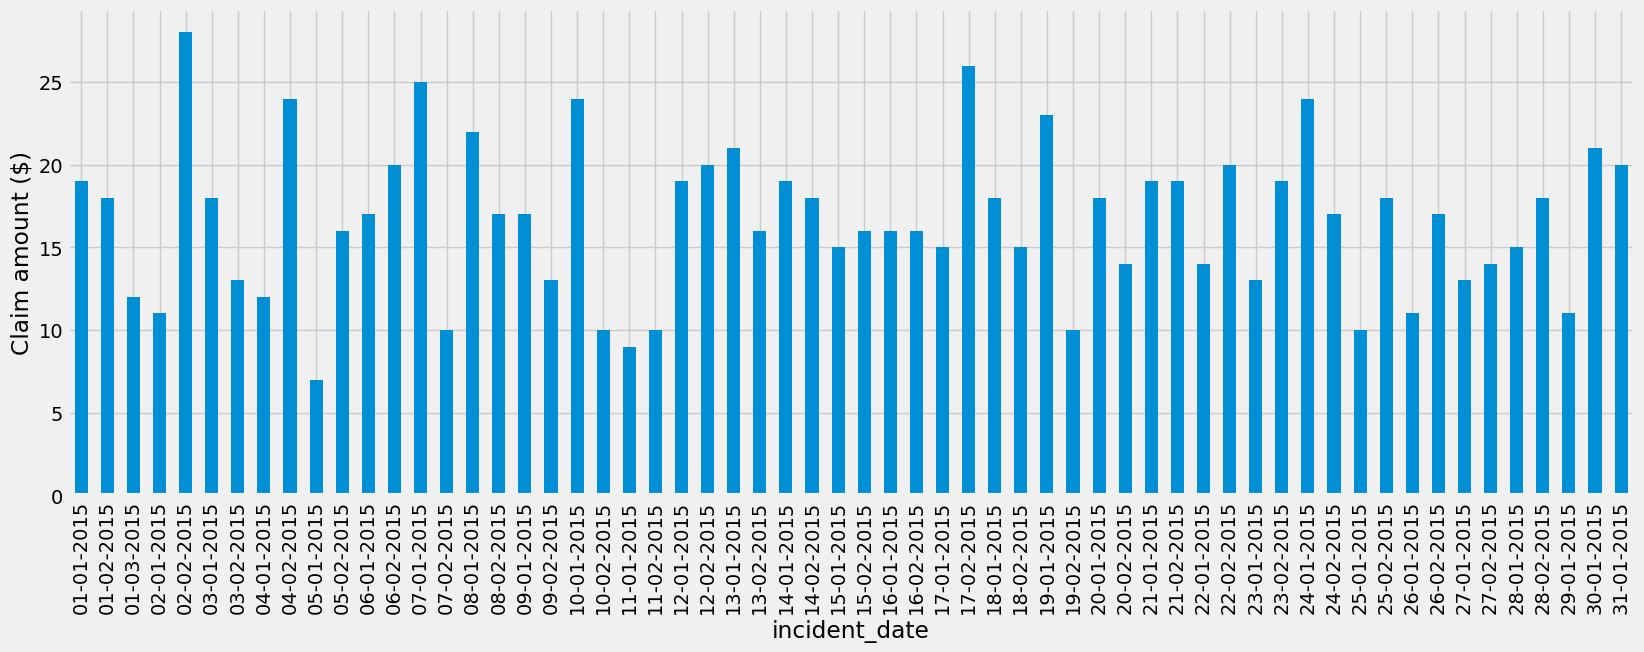

In [234]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = ic_df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

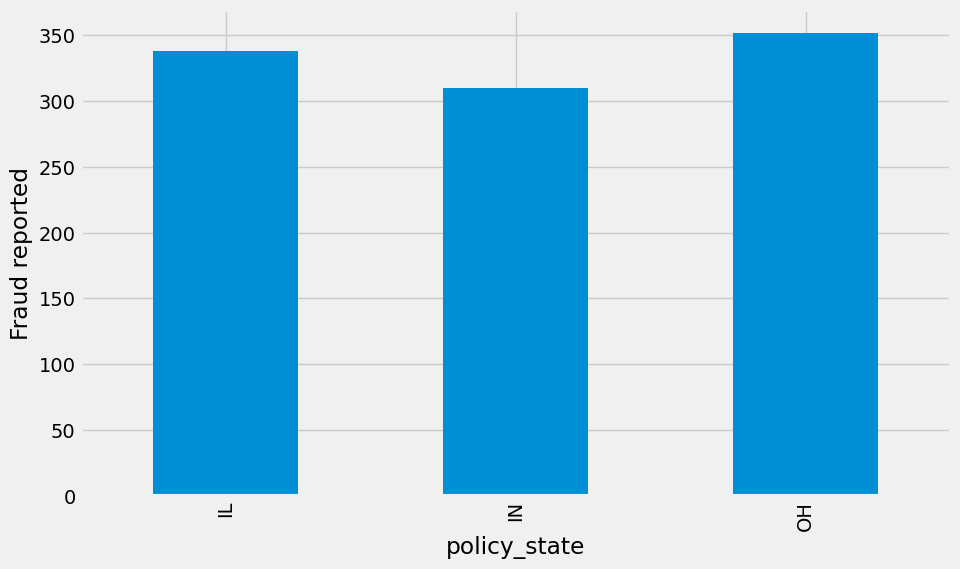

In [235]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = ic_df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


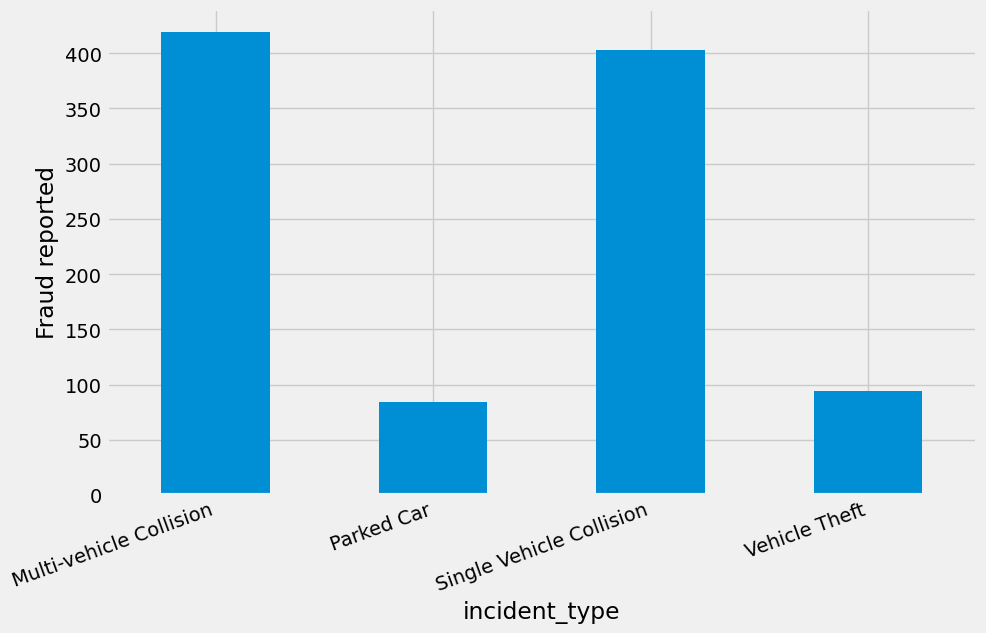

In [236]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = ic_df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

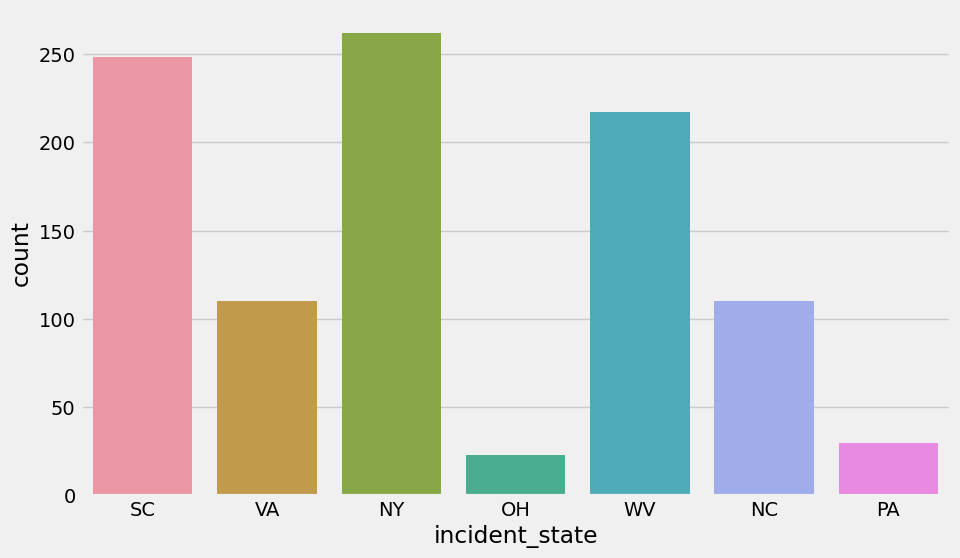

In [237]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=ic_df)

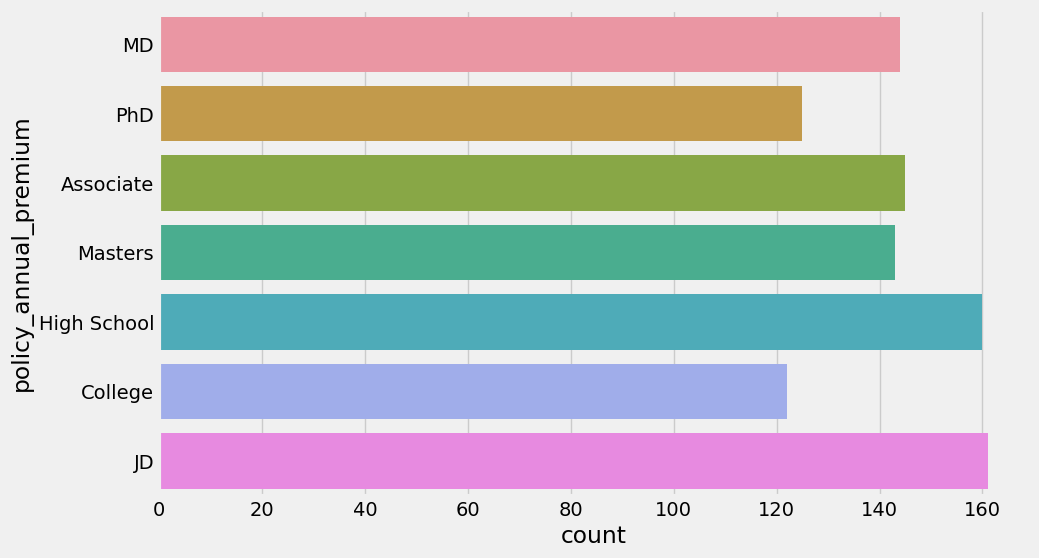

In [238]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=ic_df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

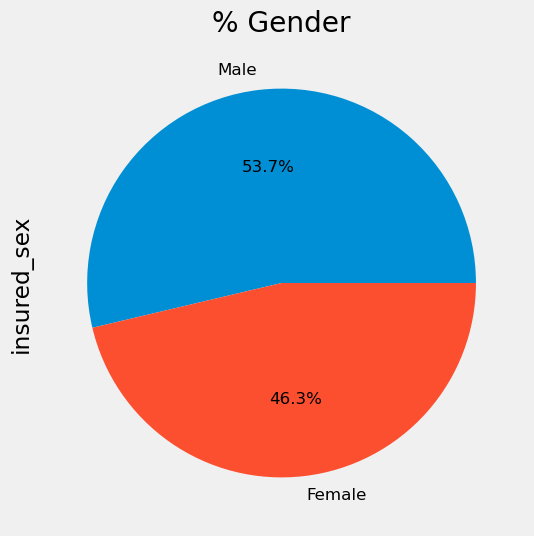

In [239]:
fig = plt.figure(figsize=(10,6))
ax = (ic_df['insured_sex'].value_counts()*100.0 /len(ic_df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

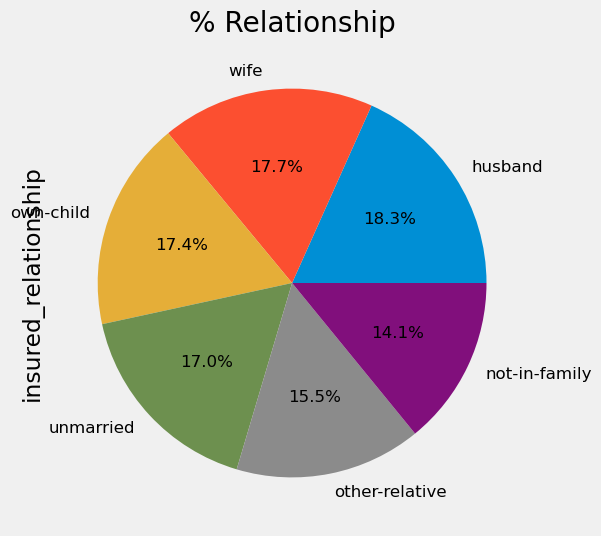

In [240]:
fig = plt.figure(figsize=(10,6))
ax = (ic_df['insured_relationship'].value_counts()*100.0 /len(ic_df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

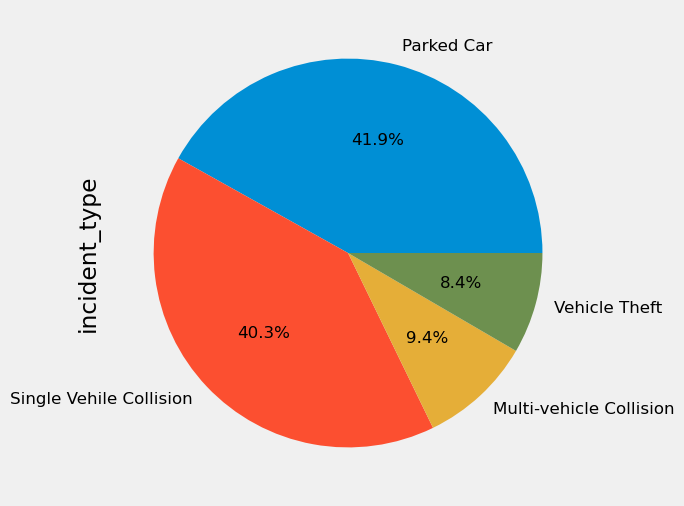

In [241]:
fig = plt.figure(figsize=(10,6))
ax = (ic_df['incident_type'].value_counts()*100.0 /len(ic_df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

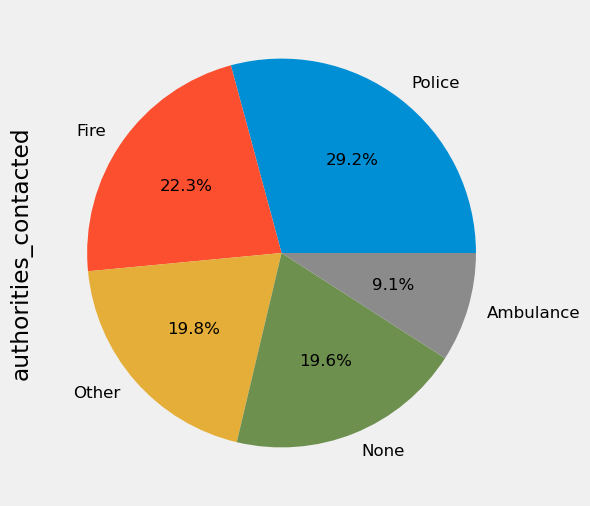

In [242]:
fig = plt.figure(figsize=(10,6))
ax = (ic_df['authorities_contacted'].value_counts()*100.0 /len(ic_df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)

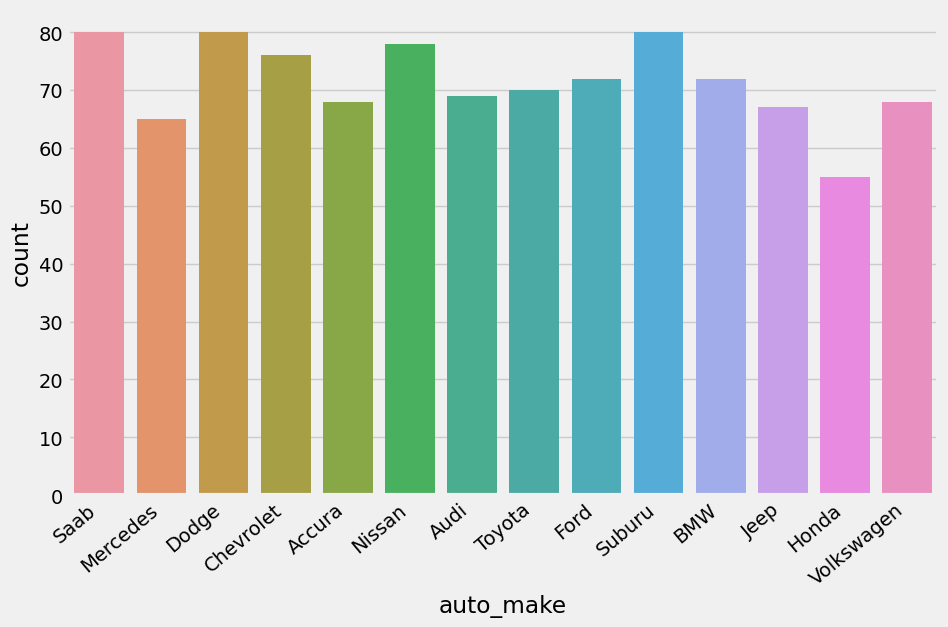

In [243]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=ic_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

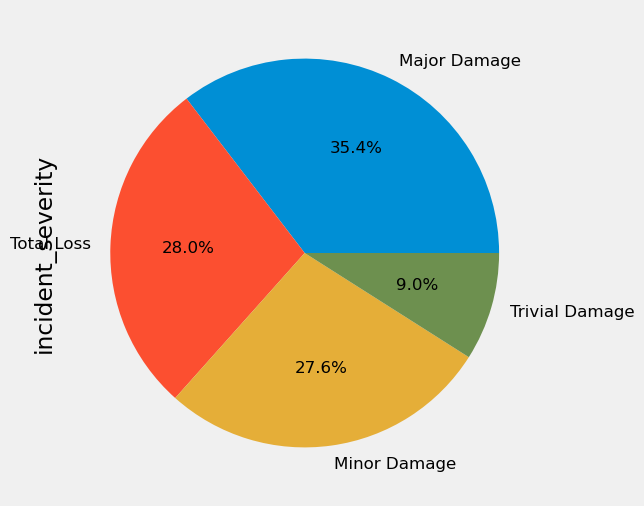

In [244]:
fig = plt.figure(figsize=(10,6))
ax = (ic_df['incident_severity'].value_counts()*100.0 /len(ic_df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  

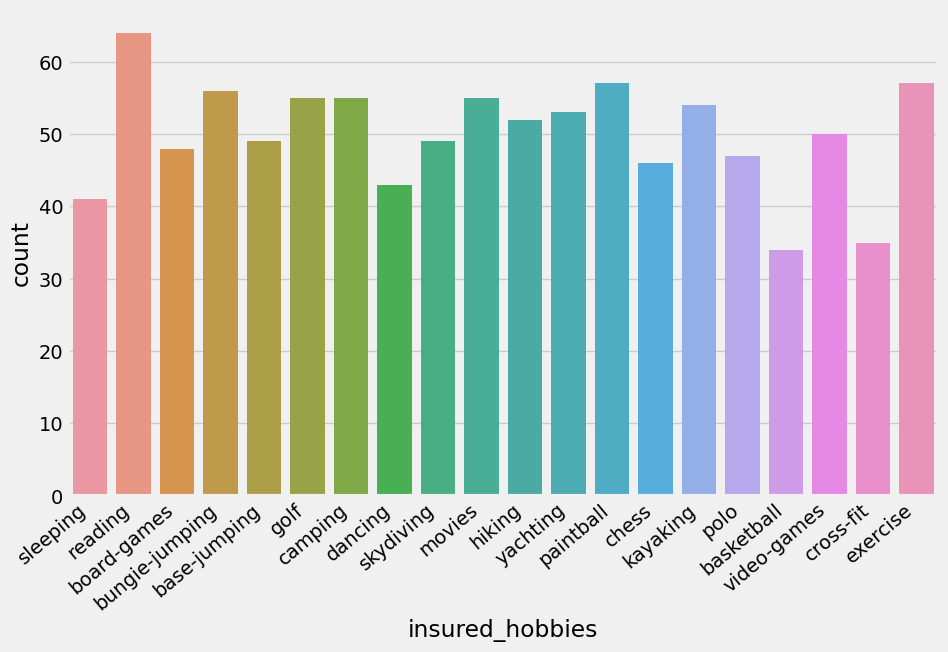

In [245]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=ic_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

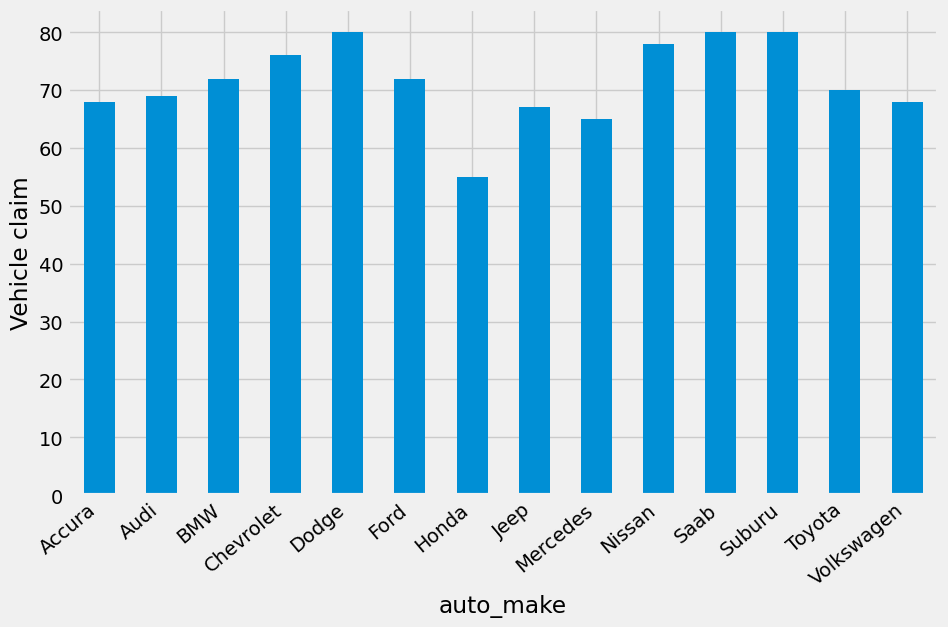

In [246]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= ic_df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

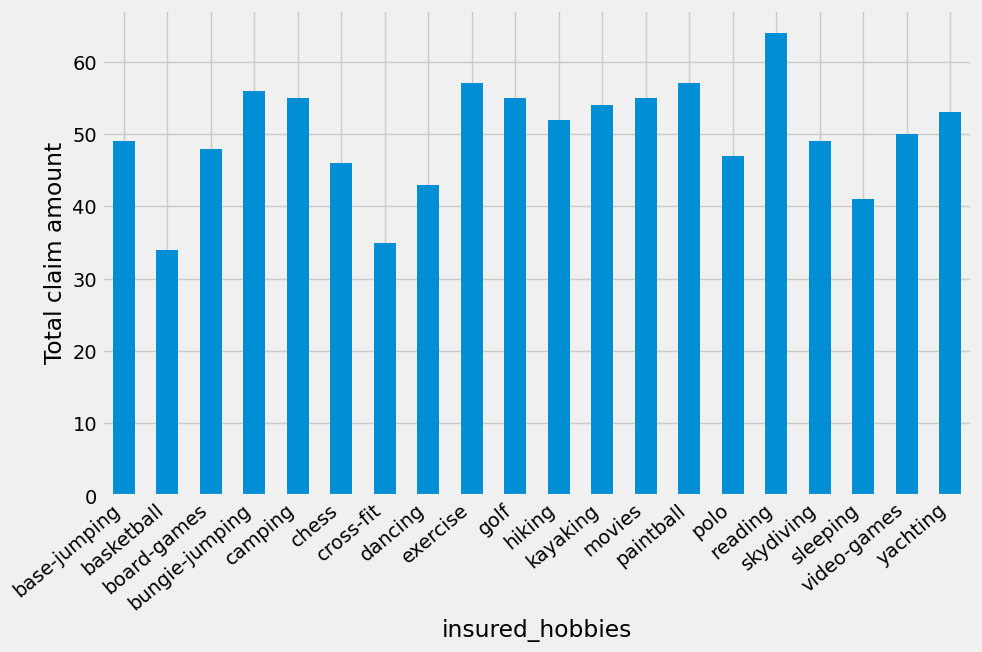

In [247]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= ic_df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Data Processing


In [248]:
ic_df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
ic_df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

ic_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [249]:
ic_df[['insured_zip']] = ic_df[['insured_zip']].astype(object)


In [250]:
ic_df.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes.


In [251]:
ic_df.auto_year.value_counts()  # check the spread of years to decide on further action.


1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned.


In [252]:
ic_df['vehicle_age'] = 2018 - ic_df['auto_year'] # Deriving the age of the vehicle based on the year value 
ic_df['vehicle_age'].head(10)


0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [253]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
ic_df['incident_period_of_day'] = pd.cut(ic_df.incident_hour_of_the_day, bins, labels=names).astype(object)
ic_df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [254]:
# Check on categorical variables:
ic_df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [255]:
# dropping unimportant columns

ic_df = ic_df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
     
    'auto_year', 
    'incident_hour_of_the_day'])

ic_df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning


In [256]:
# identify variables with '?' values
unknowns = {}
for i in list(ic_df.columns):
    if (ic_df[i]).dtype == object:
        j = np.sum(ic_df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


collision_type, property_damage, police_report_available contain many missing values. So, first isolate these variables, inspect these individually for spread of category values.


In [257]:
ic_df.collision_type.value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

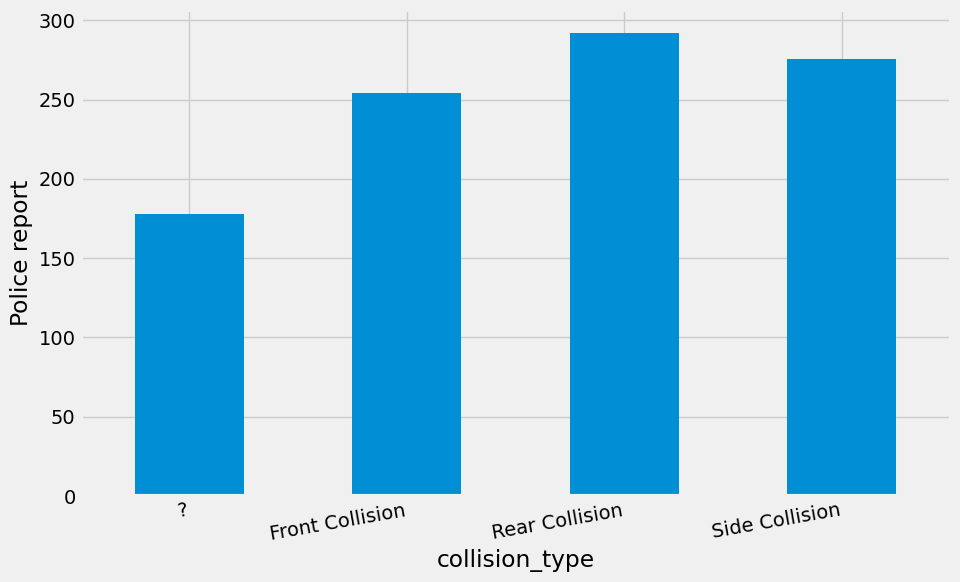

In [258]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= ic_df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [259]:
ic_df.property_damage.value_counts()


?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [260]:
ic_df.police_report_available.value_counts()


?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [261]:
ic_df.columns


Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [262]:
ic_df._get_numeric_data().head()  # Checking numeric columns


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,14
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,11
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,11
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,4
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,9


In [263]:
ic_df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,0,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,4,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,0,9,evening


In [264]:
# missing value treatment using fillna
ic_df = ic_df.replace('?', np.nan)

# we will replace the '?' by the most common collision type as we are unaware of the type.
ic_df['collision_type'].fillna(ic_df['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
ic_df['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
ic_df['police_report_available'].fillna('NO', inplace = True)

ic_df.isnull().any().any()

False

In [265]:
# let's check the correlation of authorities_contacted with the target

ic_df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
0,NO,0.255102
1,YES,0.229299


In [266]:
# let's perform target encoding for property damage

ic_df['police_report_available'] = ic_df['police_report_available'].replace(('NO','YES'),(0,1))

# let's check the values
# data['police_report_available'].value_counts()

In [267]:
# let's check the correlation of authorities_contacted with the target

ic_df[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
1,YES,0.258278
0,NO,0.242120


In [268]:
ic_df['property_damage'] = ic_df['property_damage'].replace(('NO','YES'),(0,1))


In [269]:
 #let's do target encoding for incident city

ic_df['incident_city'] = ic_df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0,1,2,3,4,5,6))


In [270]:
ic_df['incident_state'] = ic_df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0,1,2,3,4,5,6))


In [271]:
# let's perform target encoding for authorities contacted

ic_df['authorities_contacted'] = ic_df['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0,1,2,3,4))

In [272]:
# let's perform target encoding for incident severity

ic_df['incident_severity'] = ic_df['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0,1,2,3))


In [273]:
# let's perform target encoding for collision type

ic_df['collision_type'] = ic_df['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0,1,2))

In [274]:
ic_df['incident_type'] = ic_df['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0, 1, 2,3))


In [275]:
# let's do target encoding for insured relationship

ic_df['insured_relationship'] = ic_df['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0,1,2,3,4,5))


In [276]:
# let's perform target encoding for insured_hobbies

ic_df['insured_hobbies'] = ic_df['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0, 1,
                2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19))


In [277]:
ic_df['insured_occupation'] = ic_df['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0, 1,2, 3,4,5,6,7,8,9,
                                                          10,11,12,13))

In [278]:
# let's perform target encoding

ic_df['insured_education_level'] = ic_df['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0,1,2,3,4,5,6))
#data['insured_education_level'].value_counts()

In [279]:
# target encoding for sex

ic_df['insured_sex'] = ic_df['insured_sex'].replace(('FEMALE','MALE'),(0,1))
#data['insured_sex'].value_counts()

In [280]:
# target encoding for policy_csl

ic_df['policy_csl'] = ic_df['policy_csl'].replace(('500/1000','100/300','250/500'),(0,1,2))

In [281]:
ic_df['policy_state'] = ic_df['policy_state'].replace(('IL','IN','OH'),(0,1,2))


In [282]:
# let's split the data into dependent and independent sets

X = ic_df.drop(['fraud_reported'], axis = 1)
Y = ic_df['fraud_reported']



In [283]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [292]:
ic_df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries                  int64
witnesses                        int64
police_report_available          int64
total_claim_amount       

In [286]:
ic_df.drop('auto_model',axis=1,inplace=True)

In [287]:
ic_df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries                  int64
witnesses                        int64
police_report_available          int64
total_claim_amount       

In [295]:
ic_df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries                  int64
witnesses                        int64
police_report_available          int64
total_claim_amount       

In [304]:
ic_df.incident_period_of_day.unique()

array(['early_morning', 'morning', 'evening', 'past_midnight', 'night',
       'afternoon', 'fore-noon'], dtype=object)

In [291]:
ic_df.drop('auto_make',axis=1,inplace=True)

In [305]:
ic_df.drop('incident_period_of_day',axis=1,inplace=True)

# Step 4: Data Modelling
4.1: Logistic Regression

In [306]:
# let's split the data into dependent and independent sets

X = ic_df.drop(['fraud_reported'], axis = 1)
Y = ic_df['fraud_reported']


In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [308]:
lr = LogisticRegression(random_state=42)


In [309]:
lr.fit(X_train, Y_train)


LogisticRegression(random_state=42)

In [310]:
y_pred = lr.predict(X_test)


In [311]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.71


4.2: KNN Classifier

In [312]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [313]:
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [314]:
y_pred_1 = knn.predict(X_test)


In [315]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_1))


Accuracy: 0.68


4.3: Support Vector Classifier


In [316]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [317]:
svc.fit(X_train, Y_train)


SVC(random_state=42)

In [318]:
Y_pred_2 = svc.predict(X_test)


In [319]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_2))


Accuracy: 0.715


4.4: Decision Tree Classifier

In [320]:
dc = DecisionTreeClassifier(random_state=42)


In [321]:
dc.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [322]:
y_pred_3 = dc.predict(X_test)


In [323]:
print("Training Accuracy : {}%".format(dc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dc.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 79.0%


4.5: Random Forest Classifier

In [324]:
rfc = RandomForestClassifier(random_state=42)


In [325]:
rfc.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [326]:
y_pred_4 = rfc.predict(X_test)


In [327]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_4))


Accuracy: 0.755


In [328]:
print("Training Accuracy : {}%".format(rfc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rfc.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 75.5%


4.6: XGB Classifier

In [329]:
from xgboost import XGBClassifier
xgb = XGBClassifier()


In [330]:
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [331]:
y_pred_5 = xgb.predict(X_test)


In [332]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_5))


Accuracy: 0.785


CONCLUSION: XGB CLASSIFIER IS GIVING THE HIGHEST SCORE OF 78%